# Importing Libraries

In [135]:
%matplotlib inline
import matplotlib.pyplot as plt #for data visualizing
import seaborn as sns 
color = sns.color_palette()

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [136]:
"""import pandas as pd
da = pd.read_fwf("E:/Paid Projects Dataset and Codes Upwork/echocardiogram.data")
da.head()
da.shape
"""

'import pandas as pd\nda = pd.read_fwf("E:/Paid Projects Dataset and Codes Upwork/echocardiogram.data")\nda.head()\nda.shape\n'

# Reading and Exploring Data

In [137]:
data = pd.read_csv('E:/Paid Projects Dataset and Codes Upwork/echocardiogram.csv')
data.head()

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,name,group,aliveat1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,1.000,name,1,0.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0.588,name,1,0.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,1.000,name,1,0.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.788,name,1,0.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.571,name,1,0.0


In [138]:
data.shape

(133, 13)

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   survival              130 non-null    float64
 1   alive                 131 non-null    float64
 2   age                   126 non-null    float64
 3   pericardialeffusion   132 non-null    float64
 4   fractionalshortening  124 non-null    float64
 5   epss                  117 non-null    float64
 6   lvdd                  121 non-null    float64
 7   wallmotion-score      128 non-null    float64
 8   wallmotion-index      130 non-null    float64
 9   mult                  129 non-null    float64
 10  name                  131 non-null    object 
 11  group                 110 non-null    object 
 12  aliveat1              75 non-null     float64
dtypes: float64(11), object(2)
memory usage: 13.6+ KB


In [140]:
data.tail()

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,name,group,aliveat1
128,7.5,1.0,64.0,0.0,0.24,12.9,4.72,12.0,1.000,0.857,name,NaN,NaN
129,41.0,0.0,64.0,0.0,0.28,5.4,5.47,11.0,1.100,0.714,name,NaN,NaN
130,36.0,0.0,69.0,0.0,0.20,7.0,5.05,14.5,1.210,0.857,name,NaN,NaN
131,22.0,0.0,57.0,0.0,0.14,16.1,4.36,15.0,1.360,0.786,name,NaN,NaN
132,20.0,0.0,62.0,0.0,0.15,0.0,4.51,15.5,1.409,0.786,name,NaN,NaN


In [141]:
data.shape

(133, 13)

# Checking Missing Data

In [142]:
print('Total cols : ',data.shape[1],' and total rows : ',data.shape[0])


Total cols :  13  and total rows :  133


In [143]:
data.isnull().any()

survival                True
alive                   True
age                     True
pericardialeffusion     True
fractionalshortening    True
epss                    True
lvdd                    True
wallmotion-score        True
wallmotion-index        True
mult                    True
name                    True
group                   True
aliveat1                True
dtype: bool

In [144]:
print('Missing data sum :')
print(data.isnull().sum())

print('\nMissing data percentage (%):')
print(data.isnull().sum()/data.count()*100)

Missing data sum :
survival                 3
alive                    2
age                      7
pericardialeffusion      1
fractionalshortening     9
epss                    16
lvdd                    12
wallmotion-score         5
wallmotion-index         3
mult                     4
name                     2
group                   23
aliveat1                58
dtype: int64

Missing data percentage (%):
survival                 2.307692
alive                    1.526718
age                      5.555556
pericardialeffusion      0.757576
fractionalshortening     7.258065
epss                    13.675214
lvdd                     9.917355
wallmotion-score         3.906250
wallmotion-index         2.307692
mult                     3.100775
name                     1.526718
group                   20.909091
aliveat1                77.333333
dtype: float64


In [145]:
# summarize the data type and null values
# just for better visual
data_type = pd.DataFrame(data.dtypes).T.rename({0:'Column Data Type'})
null_value = pd.DataFrame(data.isnull().sum()).T.rename({0:'Null Values'})

# combine the data
data_info = data_type.append(null_value)
data_info

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,name,group,aliveat1
Column Data Type,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,float64
Null Values,3,2,7,1,9,16,12,5,3,4,2,23,58


C:\Users\Rana Saeed\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


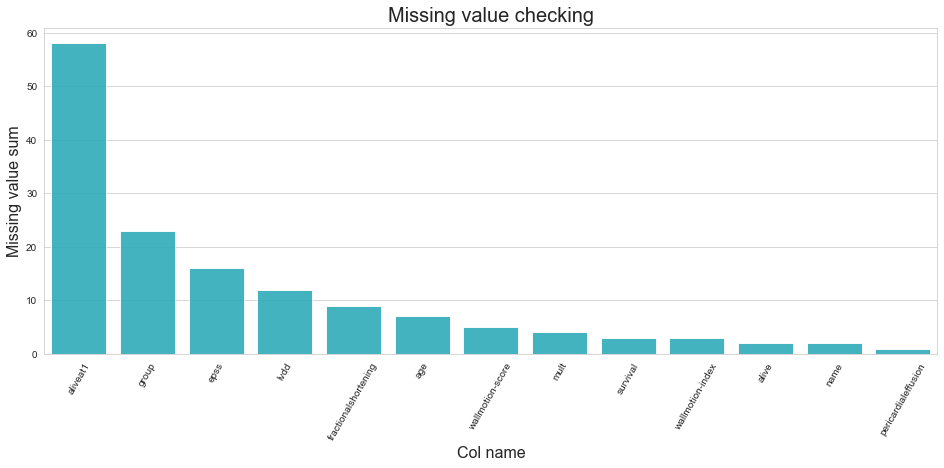

In [146]:
x=data.isnull().sum()
x=x.sort_values(ascending=False)

plt.figure(figsize=(16,6))
ax= sns.barplot(x.index, x.values, alpha=0.9,color=color[9])
locs, labels = plt.xticks()
plt.setp(labels, rotation=60)
plt.title("Missing value checking",fontsize=20)
plt.ylabel('Missing value sum', fontsize=16)
plt.xlabel('Col name', fontsize=16)
plt.show()

# Data Visualization

In [147]:
data.sample(5)

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,name,group,aliveat1
82,27.0,0.0,54.0,1.0,0.07,16.8,4.16,18.0,1.5,0.857,name,2,0.0
83,23.0,0.0,62.0,0.0,0.25,6.0,4.48,11.0,1.0,0.786,name,2,NaN
7,50.0,0.0,60.0,0.0,0.33,8.0,5.25,14.0,1.0,1.000,name,1,0.0
112,13.0,0.0,66.0,0.0,0.24,13.6,4.38,22.0,2.2,0.714,name,NaN,NaN
51,2.0,1.0,56.0,1.0,0.04,14.0,5.00,NaN,NaN,NaN,name,2,1.0


Correlation
-
It's used to see the relationship between features

- Correlation value is between -1 to 1
- Correlation value = -1 means negative correlation. If 'X' goes bigger, 'Y' goes smaller
- Correlation value = 1 means positive correlation. If 'X' goes bigger, 'Y' also goes bigger
- Correlation value = 0 means, there's no correlation between 'X' and 'Y'

[Text(0.5, 1.0, 'Correlation Matrix')]

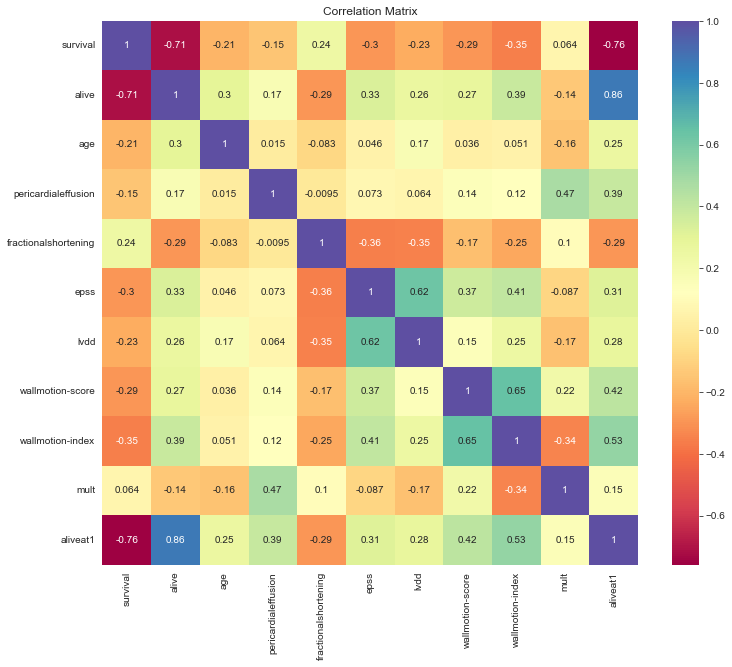

In [148]:
# Correlation matrix
corr = data.corr() 
plt.figure(figsize=(12,10))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")

In [149]:
corr_matrix = data.corr().round(2)
corr_matrix              

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,aliveat1
survival,1.00,-0.71,-0.21,-0.15,0.24,-0.30,-0.23,-0.29,-0.35,0.06,-0.76
alive,-0.71,1.00,0.30,0.17,-0.29,0.33,0.26,0.27,0.39,-0.14,0.86
age,-0.21,0.30,1.00,0.01,-0.08,0.05,0.17,0.04,0.05,-0.16,0.25
pericardialeffusion,-0.15,0.17,0.01,1.00,-0.01,0.07,0.06,0.14,0.12,0.47,0.39
fractionalshortening,0.24,-0.29,-0.08,-0.01,1.00,-0.36,-0.35,-0.17,-0.25,0.10,-0.29
epss,-0.30,0.33,0.05,0.07,-0.36,1.00,0.62,0.37,0.41,-0.09,0.31
lvdd,-0.23,0.26,0.17,0.06,-0.35,0.62,1.00,0.15,0.25,-0.17,0.28
wallmotion-score,-0.29,0.27,0.04,0.14,-0.17,0.37,0.15,1.00,0.65,0.22,0.42
wallmotion-index,-0.35,0.39,0.05,0.12,-0.25,0.41,0.25,0.65,1.00,-0.34,0.53
mult,0.06,-0.14,-0.16,0.47,0.10,-0.09,-0.17,0.22,-0.34,1.00,0.15


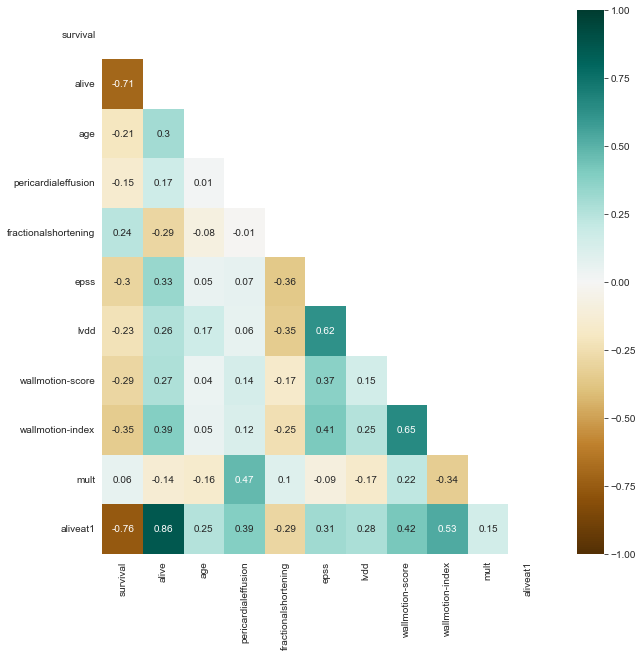

In [150]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, center=0, vmin=-1, vmax=1, mask=mask, annot=True, cmap='BrBG')
plt.show()

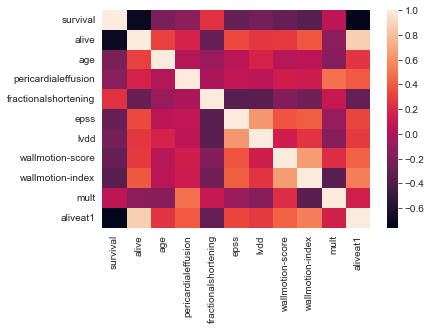

In [151]:
import seaborn as sns

corelation = data.corr()
sns.heatmap(corelation, xticklabels = corelation.columns , yticklabels = corelation.columns  )
plt.show()

# Number of people who have disease vs age

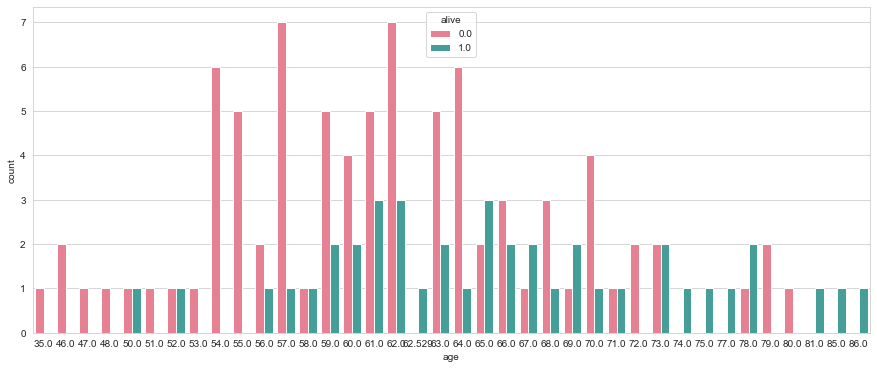

In [152]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = data, hue = 'alive',palette='husl')
plt.show()

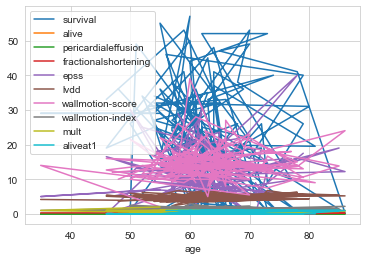

In [153]:
data.plot("age")
plt.show()

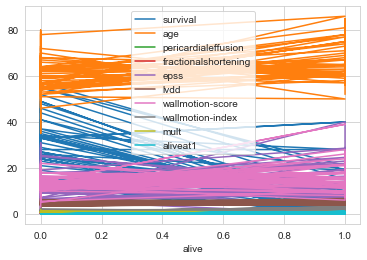

In [154]:
data.plot("alive")
plt.show()

C:\Users\Rana Saeed\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


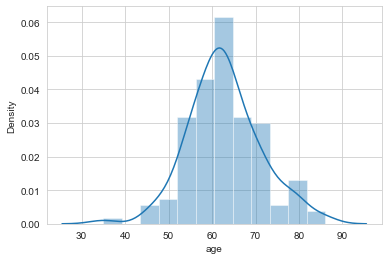

In [155]:
sns.distplot(data['age'])
plt.show()

C:\Users\Rana Saeed\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


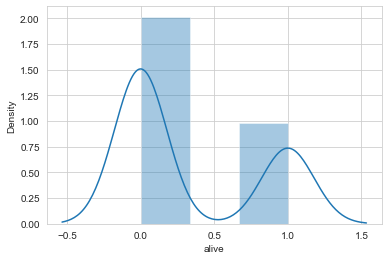

In [156]:
sns.distplot(data['alive'])
plt.show()

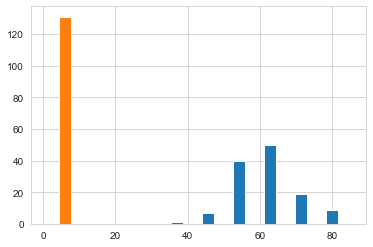

In [157]:
x = data['age']
y = data['alive']
x1 =  (x,y)
plt.hist(x1)
plt.show() 

C:\Users\Rana Saeed\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Rana Saeed\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


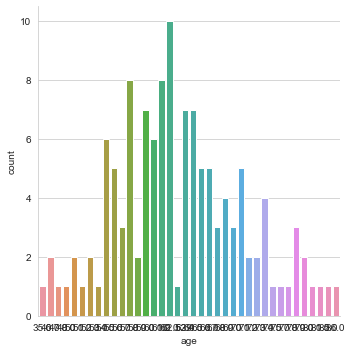

In [158]:
import seaborn as sns

sns.factorplot('age', data = data, kind = 'count')
plt.show()

C:\Users\Rana Saeed\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Rana Saeed\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


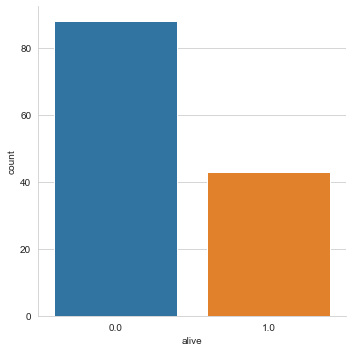

In [159]:
import seaborn as sns

sns.factorplot('alive', data = data, kind = 'count')
plt.show()

# Some observations about the data:

Categorical Features
-

In [160]:
cat_features = [feature for feature in data.columns if data[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('*'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  2
********************************************************************************
Categorical variables column name: ['name', 'group']


numerical_features

In [161]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  11
********************************************************************************
Numerical Variables Column:  ['survival', 'alive', 'age', 'pericardialeffusion', 'fractionalshortening', 'epss', 'lvdd', 'wallmotion-score', 'wallmotion-index', 'mult', 'aliveat1']


Visualizing Categorical Features
-

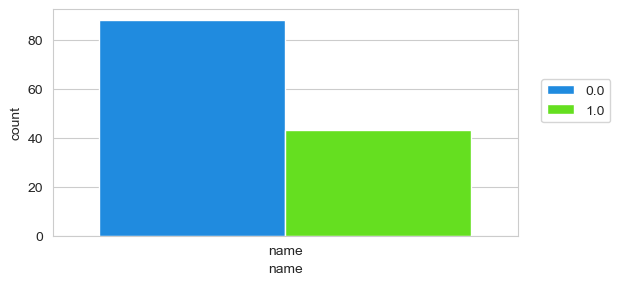

In [162]:
for col in cat_features[:-1]:
    plt.figure(figsize=(6,3), dpi=100)
    sns.countplot(data=data,x=col,hue ='alive',palette='gist_rainbow_r')
    plt.legend(loc=(1.05,0.5))

In [163]:
def get_insights(data):
    for cols in cat_features[:-1]:
        cat_group = data.groupby(cols)['group'].describe()
        percent = 100 *(cat_group['freq']/cat_group['count'])
        print('*'*70)
        print("Insights from '{}' data".format(cols))
        print('*'*70)
        for i in range(0,(len(cat_group))):
            print('{} from {} are {}'.format(round(percent[i],2),percent.index[i], cat_group['top'][i]))
        print('*'*70)

In [164]:
get_insights(data)


**********************************************************************
Insights from 'name' data
**********************************************************************
77.98 from name are 2
**********************************************************************


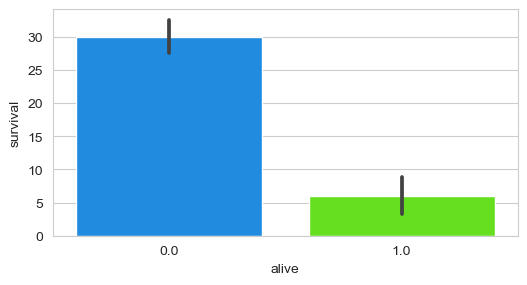

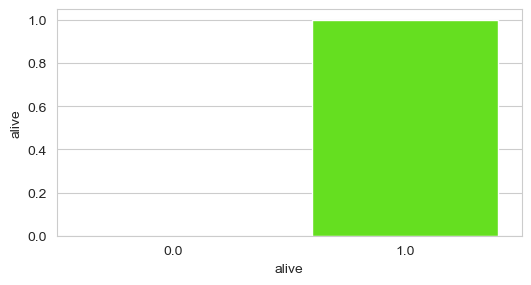

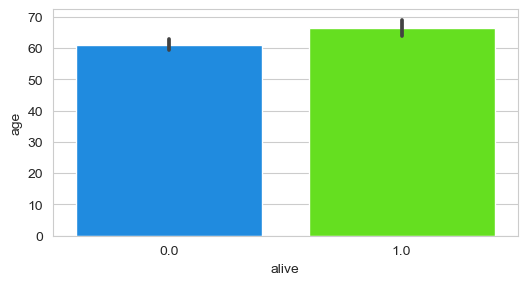

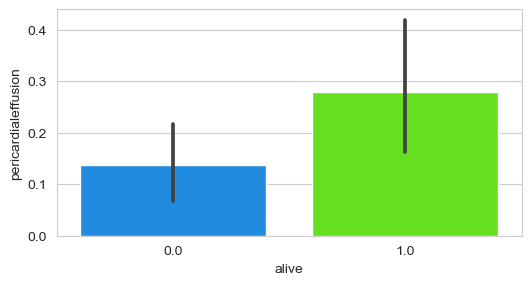

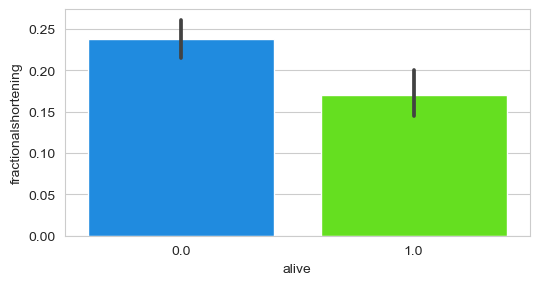

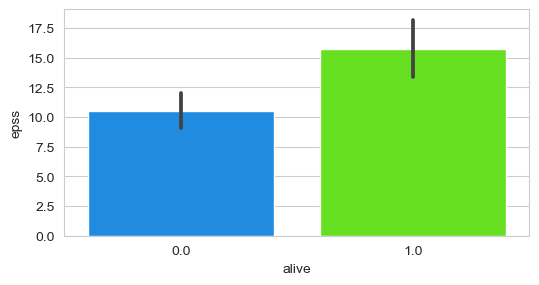

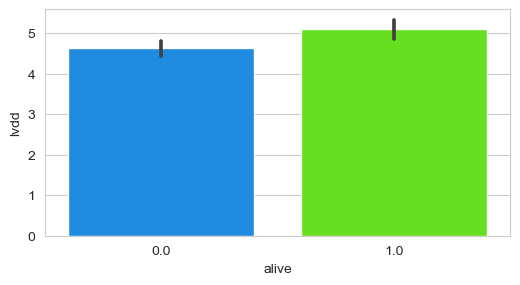

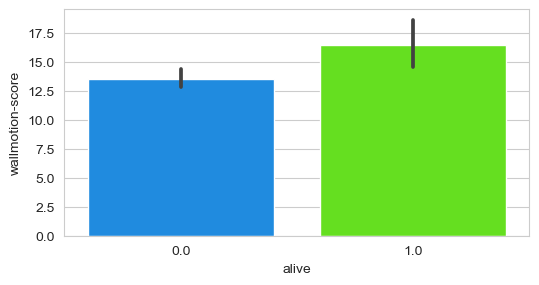

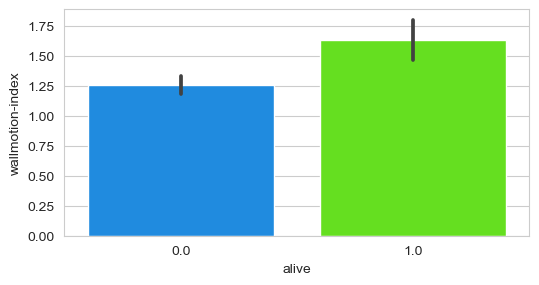

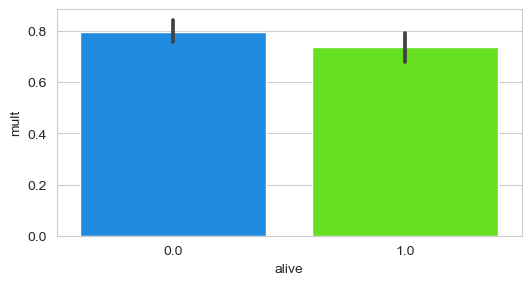

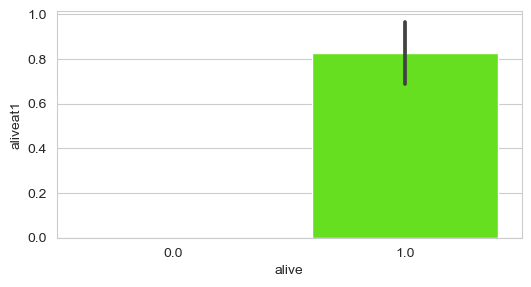

In [165]:
#Plotting the barplot of numerical features
for col in numerical_features:
    plt.figure(figsize=(6,3), dpi=100)
    sns.barplot(data=data,x='alive',y=col,palette='gist_rainbow_r')

# Drop Columns

In [167]:
data = data.drop(['name', 'group', 'aliveat1'], axis=1)
data.head()

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,1.000
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0.588
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,1.000
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.788
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.571


In [168]:
features_with_null = [features for features in data.columns if data[features].isnull().sum()>0]
for feature in features_with_null:
    print(feature, ':', round(data[feature].isnull().mean(), 4), '%')

survival : 0.0226 %
alive : 0.015 %
age : 0.0526 %
pericardialeffusion : 0.0075 %
fractionalshortening : 0.0677 %
epss : 0.1203 %
lvdd : 0.0902 %
wallmotion-score : 0.0376 %
wallmotion-index : 0.0226 %
mult : 0.0301 %


In [169]:
for feature in features_with_null:
    print(feature, ':', data[feature].unique())

survival : [1.10e+01 1.90e+01 1.60e+01 5.70e+01 2.60e+01 1.30e+01 5.00e+01 2.50e+01
 1.00e+01 5.20e+01 4.40e+01 5.00e-01 2.40e+01 2.20e+01 1.00e+00 7.50e-01
 5.00e+00 4.80e+01 2.90e+01 2.50e-01 3.60e+01 3.00e+00 2.70e+01 3.50e+01
 3.10e+01 3.20e+01 4.00e+01 4.60e+01 2.00e+00 3.70e+01 1.95e+01 2.00e+01
      nan 7.00e+00 1.20e+01 4.50e+01 5.30e+01 3.80e+01 9.00e+00 4.90e+01
 4.70e+01 4.10e+01 3.30e+01 1.50e+01 3.00e-02 2.30e+01 3.40e+01 2.10e+01
 5.50e+01 4.00e+00 1.25e+00 2.80e+01 1.70e+01 7.50e+00]
alive : [ 0.  1. nan]
age : [71.    72.    55.    60.    57.    68.    62.    46.    54.    77.
 73.    69.    62.529 66.    85.    64.    35.    75.    65.    52.
    nan 47.    63.    61.    80.    70.    79.    56.    67.    81.
 59.    58.    51.    50.    78.    86.    74.    53.    48.   ]
pericardialeffusion : [ 0.  1. 77. nan]
fractionalshortening : [0.26  0.38  0.253 0.16  0.23  0.33  0.34  0.14  0.13  0.45  0.15  0.12
 0.25  0.07  0.09  0.22  0.18  0.17  0.19  0.3     nan 0.21  0.

In [170]:
data = data.dropna(subset=['alive'])
data['alive'].isnull().sum()

0

In [171]:
discrete_features = ['pericardialeffusion']
continuous_features = data.drop(['pericardialeffusion', 'alive'], 1).columns
label = ['alive']

print(continuous_features)

Index(['survival', 'age', 'fractionalshortening', 'epss', 'lvdd',
       'wallmotion-score', 'wallmotion-index', 'mult'],
      dtype='object')


C:\Users\RANASA~1\AppData\Local\Temp/ipykernel_3872/1750679458.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  continuous_features = data.drop(['pericardialeffusion', 'alive'], 1).columns


In [172]:
for feature in discrete_features:
    data[feature] = data[feature].fillna(data[feature].mode()[0])

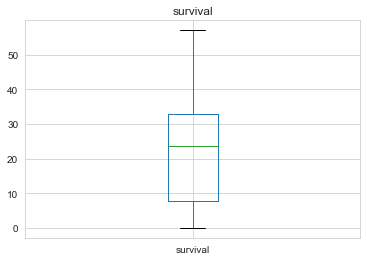

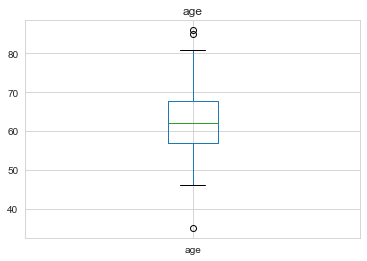

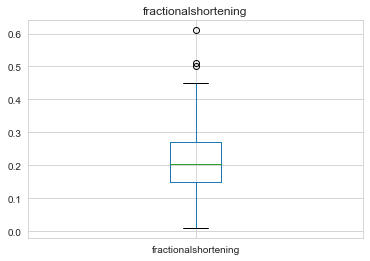

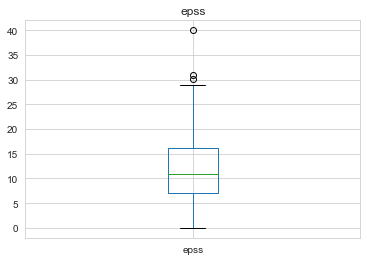

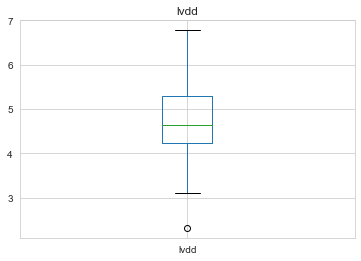

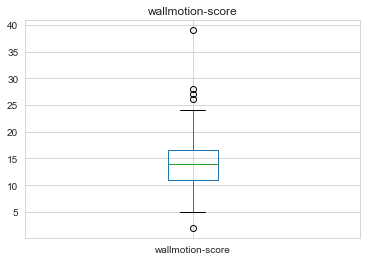

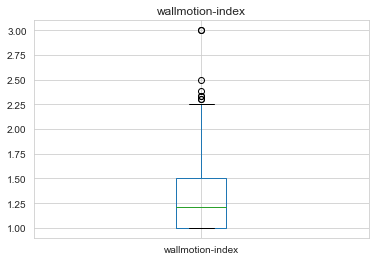

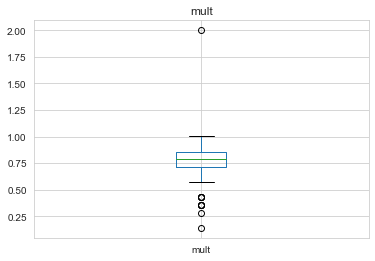

In [173]:
for feature in continuous_features:
    data.boxplot(feature)
    plt.title(feature)
    plt.show()


In [174]:
features_with_outliers = ['wallmotion-score', 'wallmotion-index', 'mult']

In [175]:
for feature in continuous_features:
    if feature in features_with_outliers:
        data[feature].fillna(data[feature].median(), inplace=True)
    else:
        data[feature].fillna(data[feature].mean(), inplace=True)

In [176]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
outliers_rows = lof.fit_predict(data)

In [177]:
mask = outliers_rows != -1

In [178]:
data.isnull().sum()

survival                0
alive                   0
age                     0
pericardialeffusion     0
fractionalshortening    0
epss                    0
lvdd                    0
wallmotion-score        0
wallmotion-index        0
mult                    0
dtype: int64

# Feature Selection

In [179]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [180]:
#define the features
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values


from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values

lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

#view transformed values
#print(y_transformed)



forest = RandomForestClassifier(n_estimators=200, n_jobs=-1, class_weight='balanced')

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
 
# find all relevant features
feat_selector.fit(X, y_transformed)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	1
Tentative: 	6
Rejected: 	2
Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	6
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	6
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	6
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	6
Iteration: 	13 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	6
Iteration: 	14 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	6
Iteration: 	15 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	6
Iteration: 	16 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	6
Iteration: 	17 / 

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=24, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x18C6FC53A40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x18C6FC53A40, verbose=2)

In [181]:
# show the most important features
most_important = data.columns[:-1][feat_selector.support_].tolist()
most_important

['wallmotion-score']

In [183]:
# select the top 7 features
top_features = data.columns[:-1][feat_selector.ranking_ <=7].tolist()
top_features

['survival',
 'age',
 'fractionalshortening',
 'epss',
 'lvdd',
 'wallmotion-score',
 'wallmotion-index']

In [184]:
data.columns

Index(['survival', 'alive', 'age', 'pericardialeffusion',
       'fractionalshortening', 'epss', 'lvdd', 'wallmotion-score',
       'wallmotion-index', 'mult'],
      dtype='object')

# Statistics on the top features

In [185]:
import statsmodels.api as sm

In [186]:
X_top = data[top_features]
y = data['alive']

In [187]:
res = sm.Logit(y,X_top).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.243478
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  alive   No. Observations:                  131
Model:                          Logit   Df Residuals:                      124
Method:                           MLE   Df Model:                            6
Date:                Fri, 26 Aug 2022   Pseudo R-squ.:                  0.6153
Time:                        00:07:37   Log-Likelihood:                -31.896
converged:                       True   LL-Null:                       -82.914
Covariance Type:            nonrobust   LLR p-value:                 9.432e-20
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
survival                -0.2051      0.039     -5.212      0.000      -0.282      -0.128
age                      0.0824      0.042      1.980      0.048       0.001       0.164
fractionalshortening    -7.8334      4.135     -1.894      0.058     -15.938       0.272
epss                     0.0991      0.070      1.419      0.156      -0.038       0.236
lvdd                    -0.4954      0.539     -0.920      0.358      -1.551       0.561
wallmotion-score        -0.1529      0.112     -1.369      0.171      -0.372       0.066
wallmotion-index         1.7109      1.245      1.374      0.169      -0.729       4.151
========================================================================================
"""

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [189]:
data = data[mask]

In [190]:
from sklearn.preprocessing import StandardScaler

data1 = pd.get_dummies(data, columns = discrete_features, drop_first = True)
scaler = StandardScaler()
data1[continuous_features] = scaler.fit_transform(data1[continuous_features])

In [191]:
data1.head()

,survival,alive,age,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,pericardialeffusion_1.0
0,-0.729968,0.0,1.039461,0.419602,-0.470229,-0.190540,-0.050728,-0.856557,1.156755,0
1,-0.221716,0.0,1.170502,1.580619,-0.940477,-0.839869,-0.050728,0.769979,-0.939966,0
2,-0.412311,0.0,-1.057203,0.419602,-1.253976,-1.722956,-0.050728,-0.856557,1.156755,0
3,2.192480,0.0,-0.401996,0.351875,0.009737,-0.186644,0.392359,0.189073,0.077860,0
4,-0.221716,1.0,-0.795120,-0.547913,1.567512,1.302915,0.835445,2.047971,-1.026482,0


In [192]:
X = data1.drop(['alive'], 1)
y = data1['alive']

C:\Users\RANASA~1\AppData\Local\Temp/ipykernel_3872/3058299409.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data1.drop(['alive'], 1)


# Splitting data into Training and Testing

Splitting 70% training data and 30% testing data

In [205]:
#Importing our ML toolkit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix,classification_report
from sklearn.svm import SVC
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((88, 9), (39, 9))

# Building Models

In [207]:
accuracy = {}

In [216]:
model1 = LogisticRegression(max_iter=200)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(accuracy_score(y_test, y_pred1))
accuracy[str(model1)] = accuracy_score(y_test, y_pred1)*100

0.8461538461538461


<AxesSubplot:>

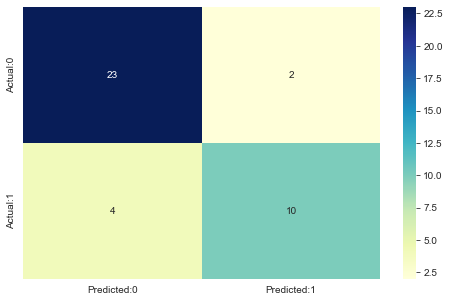

In [217]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [219]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88        25
         1.0       0.83      0.71      0.77        14

    accuracy                           0.85        39
   macro avg       0.84      0.82      0.83        39
weighted avg       0.85      0.85      0.84        39



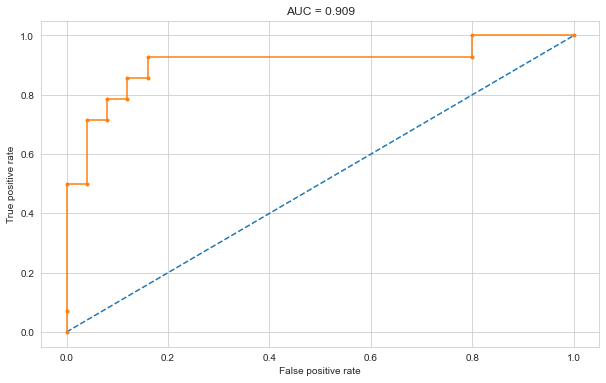

In [277]:
# ROC curve and AUC 
probs = model1.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

Save the model of LogisticRegression
-

In [220]:
import pickle

# save the model to disk
filename = 'LogisticRegression.sav'
pickle.dump(model1, open(filename, 'wb'))
 

In [221]:
 
# load the model from disk

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score( X_test,  y_test)

In [225]:
result

0.8461538461538461

# Actual VS Predicted

In [231]:
y_pred_test = loaded_model.predict(X_test)
y_pred_train = loaded_model.predict(X_train)

In [239]:
test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

train = pd.DataFrame({
    'Actual':y_train,
    'Y train predicted':y_pred_train
})

In [240]:
test.sample(10)

,Actual,Y test predicted
78,1.0,1.0
106,0.0,0.0
90,1.0,0.0
14,1.0,1.0
76,0.0,0.0
56,0.0,0.0
35,0.0,0.0
132,0.0,0.0
47,1.0,0.0
111,0.0,0.0


In [245]:
X_test.head()

,survival,age,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,pericardialeffusion_1.0
9,0.159473,-1.188245,-0.741416,0.156768,-0.333393,0.281587,-0.415068,0.800516,0
56,-0.793500,0.384253,0.709856,0.564316,1.822378,-0.050728,-0.856557,1.156755,0
132,-0.158185,-0.139913,-0.644665,-1.880973,-0.307419,0.281587,0.093805,0.067681,0
25,0.413598,-1.188245,0.806608,-0.783728,-1.164533,-0.936902,0.693299,-1.744049,0
42,1.112445,2.087793,-0.644665,0.862140,-0.619097,-0.272272,-0.159470,-0.298736,0


In [269]:
data = X_test[:1]

data

,survival,age,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,pericardialeffusion_1.0
9,0.159473,-1.188245,-0.741416,0.156768,-0.333393,0.281587,-0.415068,0.800516,0


In [270]:
prediction = loaded_model.predict(data)

print("You are not at risk") if prediction[0] == 0 else print("You are at risk")

You are not at risk


In [271]:
# predict test dataset
y_test_pred = loaded_model.predict(X_test)

# let's check the prediction and the actual value
print(y_test[:15].values)
print()
print(y_test_pred[:15].round(2))

[0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0.]

[0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]


# DecisionTreeClassifier

In [272]:
model2 = DecisionTreeClassifier(max_depth=3)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(accuracy_score(y_test, y_pred2))
accuracy[str(model2)] = accuracy_score(y_test, y_pred2)*100

0.8974358974358975


<AxesSubplot:>

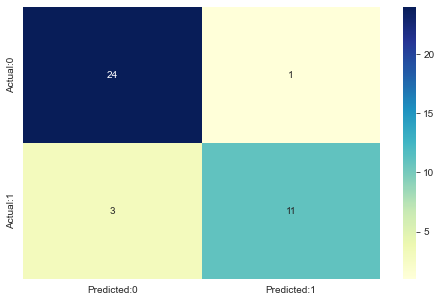

In [273]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred2)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [280]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92        25
         1.0       0.92      0.79      0.85        14

    accuracy                           0.90        39
   macro avg       0.90      0.87      0.88        39
weighted avg       0.90      0.90      0.90        39



In [295]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

logistic_f1 = f1_score(y_test, y_pred2)
print(f'The f1 score for DecisionTreeClassifier is {round(logistic_f1*100,2)}%')

The f1 score for DecisionTreeClassifier is 84.62%


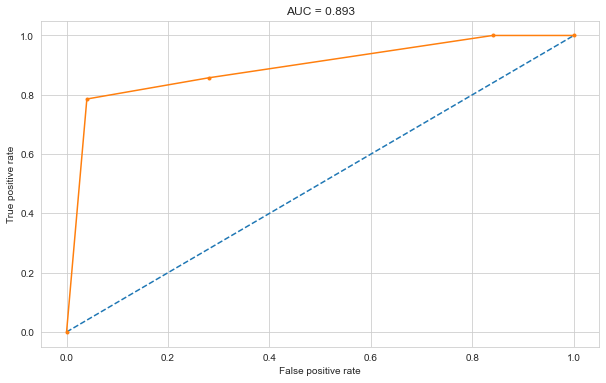

In [296]:
# ROC curve and AUC 
probs = model2.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

In [284]:
import pickle

# save the model to disk
filename = 'DecisionTreeClassifier.sav'
pickle.dump(model1, open(filename, 'wb'))
 

# RandomForestClassifier

In [290]:
model3 = RandomForestClassifier(max_depth=6)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(accuracy_score(y_test, y_pred3))
accuracy[str(model3)] = accuracy_score(y_test, y_pred3)*100

0.9230769230769231


<AxesSubplot:>

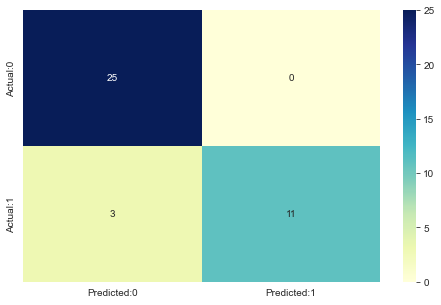

In [291]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred3)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [292]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        25
         1.0       1.00      0.79      0.88        14

    accuracy                           0.92        39
   macro avg       0.95      0.89      0.91        39
weighted avg       0.93      0.92      0.92        39



In [293]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

logistic_f1 = f1_score(y_test, y_pred3)
print(f'The f1 score for RandomForestClassifier is {round(logistic_f1*100,2)}%')

The f1 score for RandomForestClassifier is 88.0%


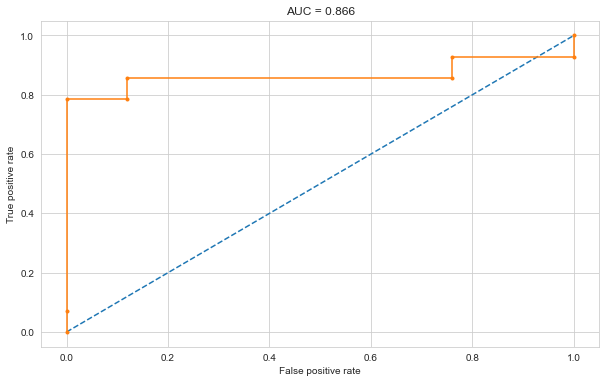

In [294]:
# ROC curve and AUC 
probs = model3.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

In [ ]:
import pickle

# save the model to disk
filename = 'RandomForestClassifier.sav'
pickle.dump(model1, open(filename, 'wb'))
 

# GradientBoostingClassifier

In [297]:
model4 = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(accuracy_score(y_test, y_pred4))
accuracy[str(model4)] = accuracy_score(y_test, y_pred4)*100

0.8717948717948718


<AxesSubplot:>

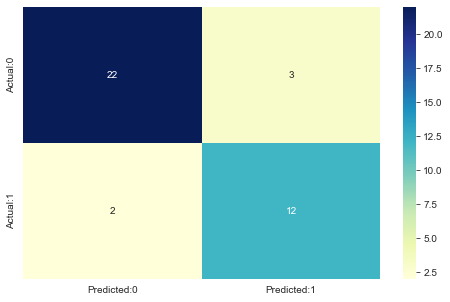

In [299]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred4)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [303]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90        25
         1.0       0.80      0.86      0.83        14

    accuracy                           0.87        39
   macro avg       0.86      0.87      0.86        39
weighted avg       0.87      0.87      0.87        39



In [304]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

logistic_f1 = f1_score(y_test, y_pred3)
print(f'The f1 score forGradientBoostingClassifier is {round(logistic_f1*100,2)}%')

The f1 score forGradientBoostingClassifier is 88.0%


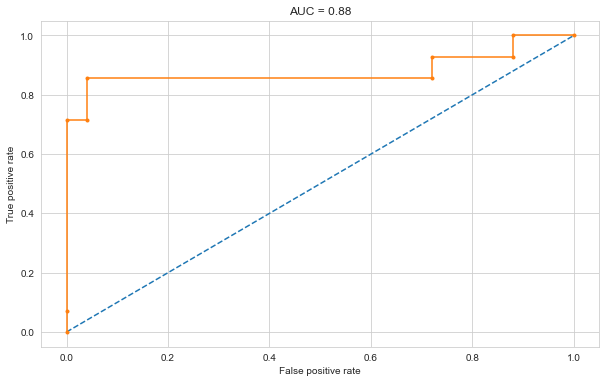

In [305]:
# ROC curve and AUC 
probs = model4.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

In [306]:
import pickle

# save the model to disk
filename = 'GradientBoostingClassifier.sav'
pickle.dump(model1, open(filename, 'wb'))
 

# Compare All Models with Accuracy Graph

In [307]:
accuracy

{'LogisticRegression(max_iter=200)': 84.61538461538461,
 'DecisionTreeClassifier(max_depth=3)': 89.74358974358975,
 'RandomForestClassifier(max_depth=6)': 92.3076923076923,
 'GradientBoostingClassifier(n_estimators=300)': 87.17948717948718}

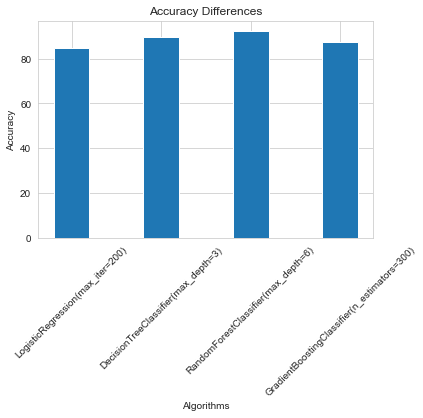

In [308]:
algos = list(accuracy.keys())
accu_val = list(accuracy.values())

plt.bar(algos, accu_val, width=0.4)
plt.title('Accuracy Differences')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()


In [309]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
import xgboost

In [310]:
param_combinations = {
    'learning_rate': np.arange(0.05, 0.4, 0.05),
    'max_depth': np.arange(3, 10),
    'min_child_weight': np.arange(1, 7, 2),
    'gamma': np.arange(0.0, 0.5, 0.1),
}


In [311]:
param_combinations = {
    'learning_rate': np.arange(0.05, 0.4, 0.05),
    'max_depth': np.arange(3, 10),
    'min_child_weight': np.arange(1, 7, 2),
    'gamma': np.arange(0.0, 0.5, 0.1),
}

XGB = xgboost.XGBClassifier()
perfect_params = RandomizedSearchCV(XGB, param_distributions=param_combinations, n_iter=6, n_jobs=-1, scoring='roc_auc')

perfect_params.fit(X, y)
perfect_params.best_params_


{'min_child_weight': 1,
 'max_depth': 9,
 'learning_rate': 0.1,
 'gamma': 0.30000000000000004}

In [312]:
model5 = xgboost.XGBClassifier(min_child_weight=3, max_depth=8, learning_rate=0.05, gamma=0.0)
score = cross_val_score(model5, X, y, cv=10)

In [313]:
print(score)
print('Mean: ', score.mean())

[0.92307692 0.92307692 1.         0.76923077 0.84615385 1.
 1.         0.83333333 0.83333333 0.58333333]
Mean:  0.8711538461538464
